## IT Today
- Ini merupakan perlombaan yang saya pernah ikuti satu tahun yang lalu di IPB
- Nama tim saya saat itu adalah Konco Kenthel
- Berikut link nya : https://www.kaggle.com/c/ittodaydsc2019/
- Data yang dicari adalah koordinat dari 2 Quadcopter bernama F450 dan F330
- Koordinat memiliki nama "Lat" yaitu Latitude dan "Lng" berarti Longtitude

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import ClassifierChain
from sklearn.multioutput import MultiOutputRegressor
from sklearn.multioutput import RegressorChain
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline
plt.style.use("ggplot")

In [3]:
data_awal=pd.read_csv("QuadData.csv")

In [4]:
data_awal.head(10)

,id,ExpID,PatternID,DeviceID,LineNo_ATT,TimeUS_ATT,DesRoll,Roll,DesPitch,Pitch,...,MOfsY_2,MOfsZ_2,LineNo_RCOU,TimeUS_RCOU,C1,C2,C3,C4,Lat,Lng
0,0,6,2,F450,14206,867051417,-2.52,-0.74,-2.30,-1.55,...,0,0,14207,867051676,1536,1578,1719,1726,-6.557158,106.733964
1,1,6,2,F450,14216,867251550,-2.64,0.28,-2.95,-1.02,...,0,0,14217,867251950,1581,1553,1697,1733,-6.557158,106.733964
2,2,6,2,F450,14226,867451412,-2.80,-0.42,-3.46,-1.85,...,0,0,14227,867451674,1601,1540,1690,1726,-6.557159,106.733964
3,3,6,2,F450,14236,867651882,-2.63,-1.31,-3.70,-3.97,...,0,0,14237,867652298,1604,1529,1712,1683,-6.557159,106.733964
4,4,6,2,F450,14246,867851500,-2.38,-0.74,-2.95,-4.04,...,0,0,14247,867851877,1594,1520,1682,1693,-6.557159,106.733964
5,5,6,2,F450,14256,868051412,-2.32,0.31,-1.61,-1.65,...,0,0,14257,868051676,1524,1582,1673,1692,-6.557158,106.733964
6,6,6,2,F450,14266,868251456,-2.49,0.34,-0.90,0.36,...,0,0,14267,868251836,1609,1495,1686,1674,-6.557158,106.733964
7,7,6,2,F450,14276,868451886,-2.80,-0.68,-0.78,-0.65,...,0,0,14277,868452277,1602,1529,1692,1663,-6.557157,106.733964
8,8,6,2,F450,14286,868651381,-2.69,-2.30,-0.58,-1.15,...,0,0,14287,868651642,1571,1584,1671,1668,-6.557157,106.733963
9,9,6,2,F450,14296,868851476,-1.94,-1.82,-0.05,-1.16,...,0,0,14297,868851854,1624,1568,1653,1658,-6.557157,106.733962


In [5]:
data_awal.tail(10)

,id,ExpID,PatternID,DeviceID,LineNo_ATT,TimeUS_ATT,DesRoll,Roll,DesPitch,Pitch,...,MOfsY_2,MOfsZ_2,LineNo_RCOU,TimeUS_RCOU,C1,C2,C3,C4,Lat,Lng
8781,8781,7,1,F330,6286,354011231,1.00,0.59,-3.33,1.26,...,0,0,6287,354011609,1195,1282,1219,1240,NaN,NaN
8782,8782,7,1,F330,6296,354211151,1.11,0.38,-3.27,1.42,...,0,0,6297,354211531,1195,1288,1226,1227,NaN,NaN
8783,8783,7,1,F330,6306,354411253,1.24,0.30,-3.07,1.54,...,0,0,6307,354411634,1195,1282,1222,1238,NaN,NaN
8784,8784,7,1,F330,6316,354611049,1.28,0.38,-3.06,1.48,...,0,0,6317,354611308,1195,1295,1206,1237,NaN,NaN
8785,8785,7,1,F330,6326,354811047,1.31,0.20,-3.01,1.57,...,0,0,6327,354811308,1195,1287,1202,1249,NaN,NaN
8786,8786,7,1,F330,6336,354911520,1.32,0.19,-2.99,1.64,...,0,0,6337,354911936,1195,1288,1213,1239,NaN,NaN
8787,8787,7,1,F330,6346,442010868,0.41,0.41,1.60,1.60,...,0,0,6347,442011136,1065,1065,1065,1065,NaN,NaN
8788,8788,7,1,F330,6356,442211055,0.41,0.41,1.60,1.60,...,0,0,6357,442211319,1065,1065,1065,1065,NaN,NaN
8789,8789,7,1,F330,6366,442410932,0.41,0.41,1.60,1.60,...,0,0,6367,442411192,1065,1065,1065,1065,NaN,NaN
8790,8790,7,1,F330,6376,442611007,0.41,0.41,1.60,1.60,...,0,0,6377,442611294,1065,1065,1065,1065,NaN,NaN


In [6]:
data_awal.describe()

,id,ExpID,PatternID,LineNo_ATT,TimeUS_ATT,DesRoll,Roll,DesPitch,Pitch,DesYaw,...,MOfsY_2,MOfsZ_2,LineNo_RCOU,TimeUS_RCOU,C1,C2,C3,C4,Lat,Lng
count,8791.000000,8791.000000,8791.000000,8791.000000,8.791000e+03,8791.000000,8791.000000,8791.000000,8791.000000,8791.000000,...,8791.0,8791.0,8791.000000,8.791000e+03,8791.000000,8791.000000,8791.000000,8791.000000,6440.000000,6440.000000
mean,4395.000000,6.737800,1.554658,12142.923558,6.636843e+08,-0.161829,-0.364055,-4.365854,-4.083440,173.994778,...,0.0,0.0,12143.926061,6.636847e+08,1436.916392,1476.820498,1506.905699,1548.789785,-6.557167,106.734011
std,2537.887442,3.439691,0.497032,7696.260801,3.233737e+08,5.486860,5.412363,6.926193,6.034614,134.092868,...,0.0,0.0,7696.257120,3.233737e+08,106.745236,105.955782,152.963563,185.985550,0.000166,0.000181
min,0.000000,1.000000,1.000000,406.000000,7.376633e+07,-21.800000,-16.280000,-32.240000,-28.670000,0.010000,...,0.0,0.0,407.000000,7.376659e+07,1065.000000,1065.000000,1065.000000,1065.000000,-6.557459,106.733689
25%,2197.500000,4.000000,1.000000,5831.500000,3.636806e+08,-2.960000,-2.750000,-9.555000,-8.560000,41.505000,...,0.0,0.0,5832.500000,3.636810e+08,1402.000000,1446.000000,1417.000000,1429.000000,-6.557235,106.733922
50%,4395.000000,7.000000,2.000000,10907.000000,5.989097e+08,-0.220000,-0.400000,-3.900000,-3.500000,179.520000,...,0.0,0.0,10908.000000,5.989100e+08,1435.000000,1472.000000,1461.000000,1458.000000,-6.557183,106.734003
75%,6592.500000,10.000000,2.000000,16816.500000,9.563811e+08,1.900000,1.450000,-0.010000,-0.450000,319.540000,...,0.0,0.0,16817.500000,9.563814e+08,1490.000000,1540.000000,1642.000000,1736.000000,-6.557034,106.734191
max,8790.000000,12.000000,2.000000,32287.000000,1.332611e+09,44.260000,53.210000,40.820000,54.770000,359.990000,...,0.0,0.0,32288.000000,1.332612e+09,1816.000000,1809.000000,1816.000000,1816.000000,-6.556893,106.734247


In [7]:
data_awal.shape

(8791, 93)

- Diketahui bahwa data memiliki 8791 baris dan 93 kolom
- Setelah melihat deskripsi masing-masing label, saya tidak mengambil seluruhnya

In [8]:
data_awal = data_awal.filter(['id', 'ExpID', 'PatternID', 'DeviceID', 
                             'Status', 'NSats', 'HDop', 'Alt.1', 'Spd',
                            'GCrs', 'Lat', 'Lng', 'LineNo_GPS','TimeUS_GPS',], axis=1)

rgr = DecisionTreeRegressor(random_state=200)

In [9]:
tes_awal = data_awal[data_awal['Lat'].isnull()]
train_awal = data_awal[data_awal['Lat'].notnull()]
data = [train_awal, tes_awal]
device_mapping = {"F450":0, "F330":1}
for dataset in data:
    dataset["DeviceID"] = dataset["DeviceID"].map(device_mapping)

In [10]:
train_awal1 = train_awal.copy()

In [11]:
tess = tes_awal.copy()

In [12]:
tes_awal.head()

,id,ExpID,PatternID,DeviceID,Status,NSats,HDop,Alt.1,Spd,GCrs,Lat,Lng,LineNo_GPS,TimeUS_GPS
516,516,6,2,0,4,14,0.77,216.94,2.251,11.46680,NaN,NaN,19378,1040529135
517,517,6,2,0,4,14,0.77,217.18,2.459,9.55242,NaN,NaN,19388,1040729374
518,518,6,2,0,4,14,0.77,217.47,2.463,6.10603,NaN,NaN,19398,1040929453
519,519,6,2,0,4,14,0.77,217.69,2.149,7.53854,NaN,NaN,19408,1041129296
520,520,6,2,0,4,14,0.77,217.81,1.861,6.08728,NaN,NaN,19418,1041329342


In [13]:
train_awal.Lng = (train_awal["Lng"]-106)*100000
train_awal.Lat = (train_awal["Lat"]+6)*-100000

In [14]:
train_awal.shape

(6440, 14)

In [15]:
X = train_awal.drop(["id", "Lat", "Lng"], axis=1)
y = train_awal.filter(["Lat", "Lng"], axis=1)

tes_awal = tes_awal.drop(["id", "Lat", "Lng"], axis=1)

In [16]:
# scale = StandardScaler()
# X = scale.fit(X)
# tes_awal = scale.transform(tes_awal)

In [17]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=29)

# Xx = X_test.filter(["id", "DeviceID"], axis=1)

In [18]:
# Yy = Xx.filter(["DeviceID"], axis=1)
# Yy["Lat"] = y_test["Lat"]
# Yy["Lng"] = y_test["Lng"]

# Yy["Lng"] = Yy["Lng"]/100000+106
# Yy["Lat"] = Yy["Lat"]/-100000-6

In [33]:
from sklearn.tree import DecisionTreeRegressor

rgr = DecisionTreeRegressor(random_state=200)
rgr.fit(X, y)
preed = rgr.predict(tes_awal)

In [34]:
preed[:,1] = preed[:,1]/100000+106
preed[:,0] = preed[:,0]/-100000-6

In [35]:
predict = pd.DataFrame({
    "id":tess["id"],
    "DeviceID":tess["DeviceID"],
    "Lat":preed[:,0],
    "Lng":preed[:,1]})

In [36]:
predict.head()

,id,DeviceID,Lat,Lng
516,516,0,-6.557453,106.734242
517,517,0,-6.557389,106.734235
518,518,0,-6.557389,106.734235
519,519,0,-6.557389,106.734235
520,520,0,-6.557389,106.734235


#### Visualisasi
- Untuk Mendapatkan gambar map lokasi, saya mengambilknya dari website openstreetmap.org
- Berdasarkan hasil statitiska deskripsi sebelumnya, besar koordinat Latitude terkecil dan terbesar (-6.557459, -6.556893)
- Berdasarkan hasil statitiska deskripsi, koordinat Longtitude terkecil dan terbesar (106.733689, 106.734247)
- koordinat Latitude (-6.558000, -6.555000) dan Longtitude (106.732, 106.735)

In [37]:
i = [106.732, 106.735, -6.5580, -6.5550]

In [38]:
mapitb = plt.imread("ittoday1.png")

In [49]:
def plot_on_map(data, i, mapitb, s=10, alpha=0.2):
    plt.figure(figsize=(20,10))
    plt.imshow(mapitb, zorder=0, extent=i)
    np.random.seed(19680801)
    plt.scatter(data["Lng"], data["Lat"], zorder=1, alpha=alpha, c="brown", s=s)
    plt.xlim((i[0], i[1]))
    plt.ylim((i[2], i[3]))
    plt.title("Koordinat F450 + F330")

In [52]:
def plot_on_split_map(df, BB, mapitb, s=10, alpha=0.2):
    fig, axs = plt.subplots(1, 2, figsize=(16,10))
    
    df1 = df.loc[df.DeviceID==0]
    df2 = df.loc[df.DeviceID==1]    
    
    axs[0].scatter(df1.Lng, df1.Lat, zorder=1, alpha=alpha, c="purple", s=s)
    axs[0].set_xlim((BB[0], BB[1]))
    axs[0].set_ylim((BB[2], BB[3]))
    axs[0].set_title("F450")
    axs[0].imshow(mapitb, zorder=0, extent=BB)

    axs[1].scatter(df2.Lng, df2.Lat, zorder=1, alpha=alpha, c="grey", s=s)
    axs[1].set_xlim((BB[0], BB[1]))
    axs[1].set_ylim((BB[2], BB[3]))
    axs[1].set_title("F330")
    axs[1].imshow(mapitb, zorder=0, extent=BB)

In [41]:
def plot_on_split_map_banding(dfpre, dfasli, BB, mapitb, s=10, alpha=0.2):
    fig, axs = plt.subplots(1, 2, figsize=(16,10))
    
    dfx1 = dfpre.loc[dfpre.DeviceID==0]
    dfy1 = dfasli.loc[dfasli.DeviceID==0]
    dfx2 = dfpre.loc[dfpre.DeviceID==1]    
    dfy2 = dfasli.loc[dfasli.DeviceID==1]    
    
    axs[0].scatter(dfx1.Lng, dfx1.Lat, zorder=1, alpha=alpha, c="purple", s=s)
    axs[0].scatter(dfy1.Lng, dfy1.Lat, zorder=1, alpha=alpha, c='blue', s=s)    
    axs[0].set_xlim((BB[0], BB[1]))
    axs[0].set_ylim((BB[2], BB[3]))
    axs[0].set_title('F450')
    axs[0].imshow(mapitb, zorder=0, extent=BB)

    axs[1].scatter(dfx2.Lng, dfx2.Lat, zorder=1, alpha=alpha, c='grey', s=s)
    axs[1].scatter(dfy2.Lng, dfy2.Lat, zorder=1, alpha=alpha, c='orange', s=s)
    axs[1].set_xlim((BB[0], BB[1]))
    axs[1].set_ylim((BB[2], BB[3]))
    axs[1].set_title('F330')
    axs[1].imshow(mapitb, zorder=0, extent=BB)

### Koordinat hasil prediksi

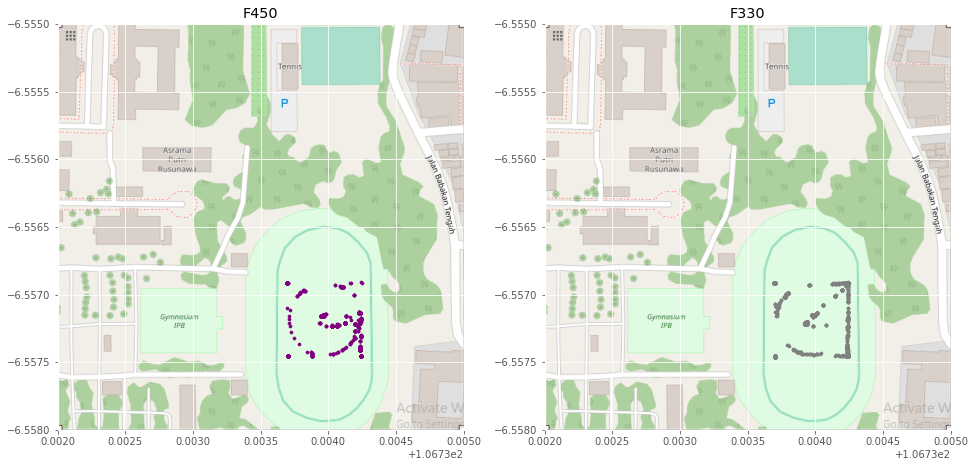

In [42]:
plot_on_split_map(predict, i, mapitb, s=10, alpha=1)

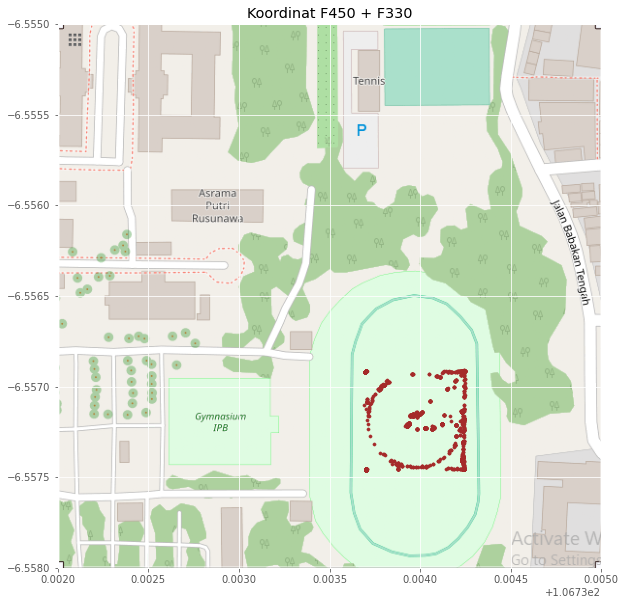

In [56]:
plot_on_map(predict, i, mapitb, s=10, alpha=1)

### Koordinat data training

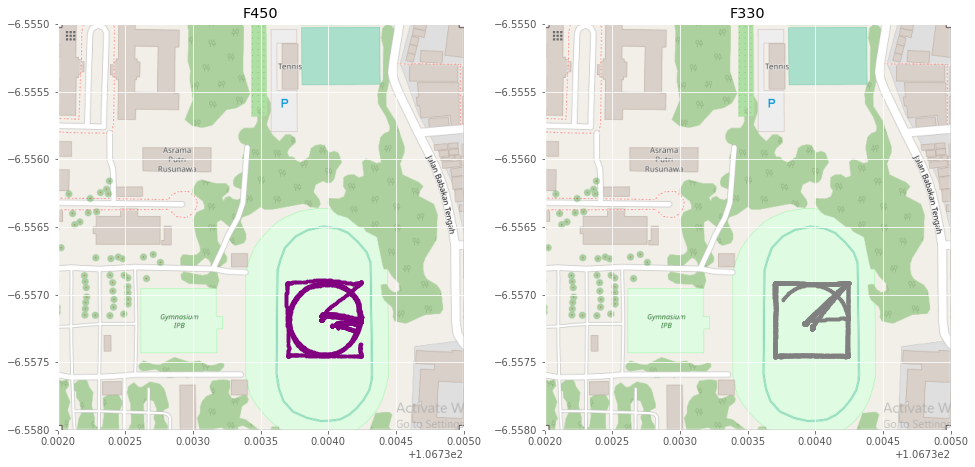

In [55]:
plot_on_split_map(train_awal1, i, mapitb, s=10, alpha=1)

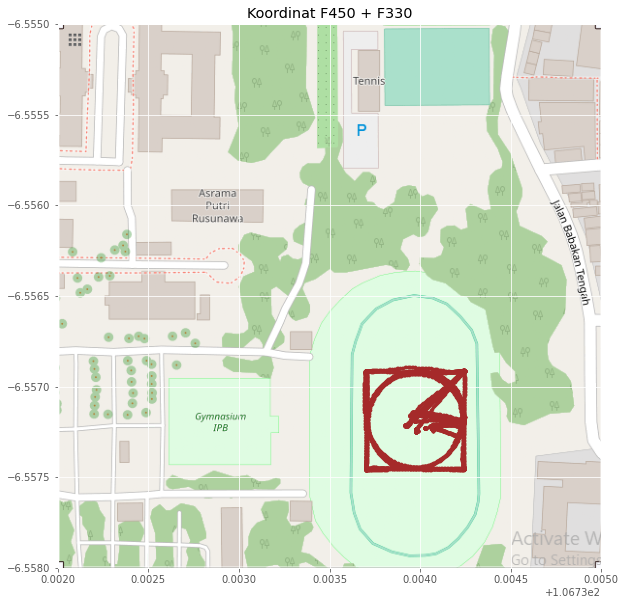

In [54]:
plot_on_map(train_awal1, i, mapitb, s=10, alpha=1)

In [193]:
predict.to_csv("DataScience_Prediksi_KoncoKenthel.csv", columns=["id", "Lat", "Lng"], index=False)

In [194]:
aa = pd.read_csv("DataScience_Prediksi_KoncoKenthel.csv")
aa.tail()

,id,Lat,Lng
2346,8786,-6.557288,106.733938
2347,8787,-6.557288,106.733938
2348,8788,-6.557288,106.733938
2349,8789,-6.557288,106.733938
2350,8790,-6.557288,106.733938
